# **insurance predication for people**

In [28]:
# import relevent libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load data
df = pd.read_csv('insurance.csv')
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

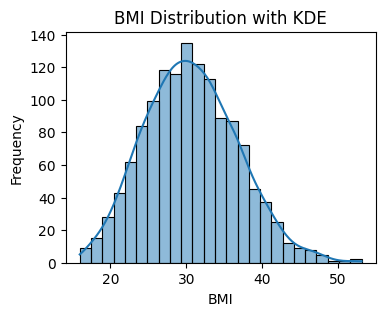

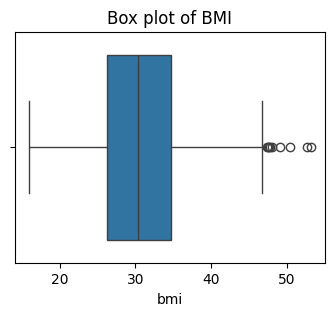

In [12]:
# plotting a graph for visualize outliers in the bmi

## bmi histogram to check skewness
plt.figure(figsize = (4,3))
sns.histplot(df['bmi'], kde = True)
plt.title("BMI Distribution with KDE")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

## bmi box plot for check outliers
plt.figure(figsize = (4,3))
sns.boxplot(x = df['bmi'])
plt.title("Box plot of BMI")
plt.show()

In [13]:
# Identify outliers

# Calculate Q1, Q3 and IQR
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f" lower_bound : {lower_bound} , upper_bound : {upper_bound}")


 lower_bound : 13.674999999999994 , upper_bound : 47.31500000000001


In [31]:
# remove the outliers
df_clean = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]
df_clean.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
# One-hot encoding for categorical variables
df_clean = pd.get_dummies(df_clean,drop_first = True)

In [16]:
df_clean.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.114785,0.042103,0.301317,-0.018089,-0.025075,0.001624,-0.012249,0.009868
bmi,0.114785,1.000000,0.017366,0.193270,0.039966,-0.002868,-0.128760,0.255903,0.000655
children,0.042103,0.017366,1.000000,0.069125,0.019973,0.007234,0.025449,-0.019239,0.019641
charges,0.301317,0.193270,0.069125,1.000000,0.064161,0.785896,-0.036482,0.071191,-0.046341
sex_male,-0.018089,0.039966,0.019973,0.064161,1.000000,0.080269,-0.011291,0.010721,-0.000771
smoker_yes,-0.025075,-0.002868,0.007234,0.785896,0.080269,1.000000,-0.035315,0.068055,-0.039665
region_northwest,0.001624,-0.128760,0.025449,-0.036482,-0.011291,-0.035315,1.000000,-0.344453,-0.322709
region_southeast,-0.012249,0.255903,-0.019239,0.071191,0.010721,0.068055,-0.344453,1.000000,-0.344453
region_southwest,0.009868,0.000655,0.019641,-0.046341,-0.000771,-0.039665,-0.322709,-0.344453,1.000000


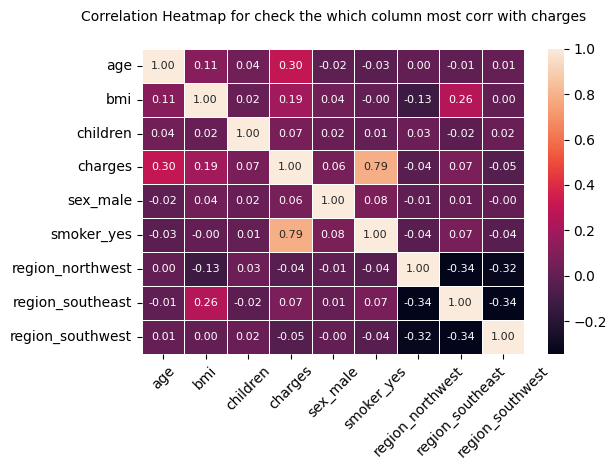

In [27]:
# check the correalation of bmi and charges
sns.heatmap( df_clean.corr(),
    annot=True,      # Show values
    fmt=".2f",       # Format values to 2 decimal places
    linewidths=0.5,   # Add lines between cells
    annot_kws={"size": 8})

# Customize titles
plt.title("Correlation Heatmap for check the which column most corr with charges", fontsize=10 , pad=20)
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()       # Prevent label cutoff
plt.show()


In [18]:
df_clean.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [25]:
# ferature and target
x = df_clean[['age', 'bmi','smoker_yes']]
y = df_clean['charges']

In [24]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
# Model training
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred =  model.predict(x_test)
y_train_pred = model.predict(x_train)

In [36]:
print(f' Testing results : {r2_score(y_test,y_pred)}')
print(f' Training results : {r2_score(y_train,y_train_pred)}')

 Testing results : 0.7488004023499726
 Training results : 0.7455760106931366


In [37]:
print(f' Testing results : {mean_squared_error(y_test,y_pred)}')
print(f' Training results : {mean_squared_error(y_train,y_train_pred)}')

 Testing results : 34916425.2612677
 Training results : 36901822.67076611


In [38]:
# Save model to pickle file
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved as 'linear_model.pkl'")

Model saved as 'linear_model.pkl'
